## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = df['Mouse ID'].count()
mice_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df[df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df.count()
clean_df_count

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumor_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_stats = pd.DataFrame({'Mean' : tumor_mean,
                           'Median' : tumor_median,
                           'Variance' : tumor_var,
                           'Standard Deviation' : tumor_std,
                             'SEM' : tumor_sem}).round(2)

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = clean_df.groupby('Drug Regimen').agg(
            Mean = ('Tumor Volume (mm3)', np.mean),\
            Median = ('Tumor Volume (mm3)', np.median),\
            Variance = ('Tumor Volume (mm3)', np.var),\
            Standard_Deviation = ('Tumor Volume (mm3)', np.std),\
            SEM = ('Tumor Volume (mm3)', st.sem)).round(2)


agg_stats



,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

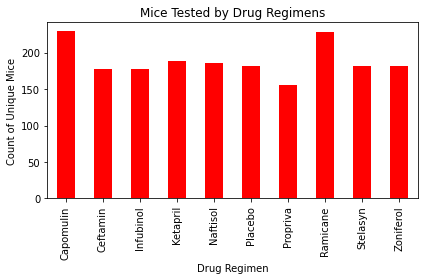

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique_mice = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
bar_chart = unique_mice.plot(kind='bar', title='Mice Tested by Drug Regimens', color='red')
bar_chart.set_xlabel('Drug Regimen')
bar_chart.set_ylabel('Count of Unique Mice')
plt.tight_layout()
plt.show()

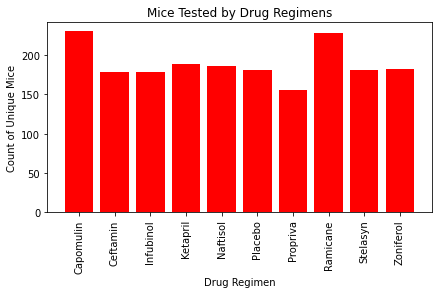

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(unique_mice))

plt.bar(x_axis, unique_mice, color='r')
plt.title('Mice Tested by Drug Regimens')

labels = unique_mice.reset_index()
plt.xticks(x_axis, labels['Drug Regimen'], rotation='vertical')
plt.tight_layout()

plt.xlabel('Drug Regimen')
plt.ylabel('Count of Unique Mice')
plt.show()


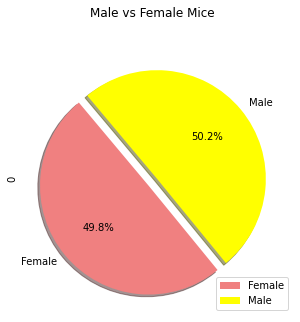

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = clean_df.groupby(['Mouse ID','Sex'])
gender_stats = pd.DataFrame(mice_gender.size())
gender_df = pd.DataFrame(gender_stats.groupby(['Sex']).count())

colors = ['lightcoral', 'yellow']
explode = (0.1,0)

gender_pie = gender_df.plot.pie(title="Male vs Female Mice",subplots=True, figsize=(5,5), explode=explode, colors=colors, 
                                startangle=130, shadow=True, autopct="%1.1f%%")



<ipython-input-11-a12156aecace>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_df, labels=labels, explode=explode, colors=colors,


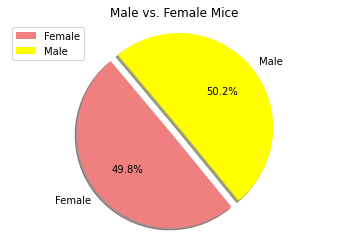

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ("Female", "Male")
colors = ['lightcoral', 'yellow']
explode = (0,0.1)

plt.pie(gender_df, labels=labels, explode=explode, colors=colors, 
                                startangle=130, shadow=True, autopct="%1.1f%%")
plt.title("Male vs. Female Mice")
plt.legend()
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_sort = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

drug_df = drug_sort.to_frame()
#drug_df




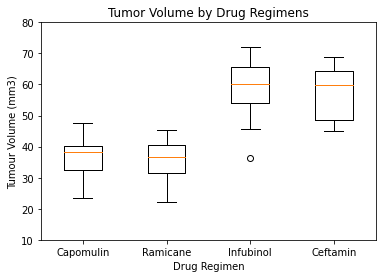

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

box_df = drug_df.reset_index()
tumors = box_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumors)
tumor_df = tumor_df.reindex(four_regimens)
tumor_volumes = [vol for vol in tumor_df['Tumor Volume (mm3)']]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volumes, labels=four_regimens)
plt.ylim(10, 80)
plt.title('Tumor Volume by Drug Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumour Volume (mm3)')
plt.show()

    

In [14]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = drug_sort.quantile([.25, .5, .75])
#quartiles

first_q = quartiles[.25]
second_q = quartiles[.5]
third_q = quartiles[.75]
#third_q

iqr = third_q - first_q
iqr
     
    # Determine outliers using upper and lower bounds
    
lower_bound = first_q - (1.5*iqr)
upper_bound = third_q + (1.5*iqr)
print(lower_bound, upper_bound)

17.400437649999986 93.49183637000002


## Line and Scatter Plots

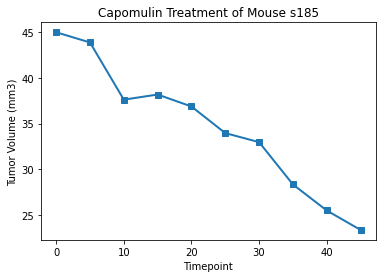

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Pull out data for specific Mouse s185 and Capomulin 
capomulin = clean_df.loc[clean_df["Drug Regimen"]=='Capomulin']
mouse_cap = capomulin.loc[capomulin['Mouse ID']== 's185']

#Assign x axis and y axis variables
time_x = mouse_cap['Timepoint']
tumor_y = mouse_cap['Tumor Volume (mm3)']

#Plot graph
plt.plot(time_x, tumor_y, marker='s',linewidth=2)
plt.title('Capomulin Treatment of Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()




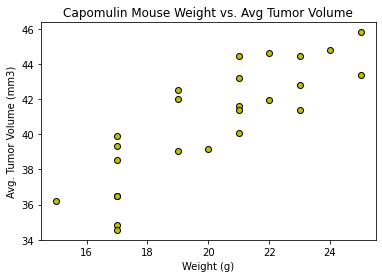

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = capomulin.groupby(['Mouse ID']).mean()

#Plot scatter plot and format 
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'], color='y', edgecolor='black')
plt.title('Capomulin Mouse Weight vs. Avg Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

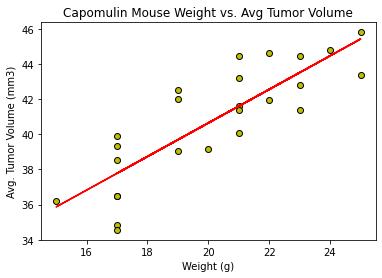

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

slope, intercept, rvalue, pvalue, stderr = linregress(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])

x_values = scatter_data['Weight (g)']

regress_values = slope * x_values + intercept 


plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'], color='y', edgecolor='black')
plt.plot(x_values, regress_values, color="red")

plt.title('Capomulin Mouse Weight vs. Avg Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')

plt.show()

